# __SCALLING__

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Transform numerical data into same range (typically small). 
<br> Some method may work best with scaling
ex. KNN, Neural Network, Linear Model.
<br>
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [ ]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head(1)

In [ ]:
#2. memvisualisasikan data untuk melihat range data

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(tips['tip'])

plt.subplot(1,2,2)
sns.histplot(tips['total_bill'])

plt.tight_layout()
plt.show() 

#terlihat beda range data, perlu dilakukan scalling

In [ ]:
#Melihat describe data 

tips[['tip', 'total_bill']].describe()
#(terlihat nilai min dan max kedua variabel jaduh berbeda)

from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [ ]:
#Import Library

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
#Menentukan variabel X (best practice)

X = tips[['tip', 'total_bill']]

> ## __MinMax Scaler__

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [ ]:
#Melakukan scaling

minmax = MinMaxScaler() #membuat objek
X_minmax = minmax.fit_transform(X) #pake fit&transform karena tidak pake data splitting 
X_minmax = pd.DataFrame(X_minmax, columns=X.columns) #dijadikan df
X_minmax

In [ ]:
#Melihat describe hasil scaling minmax

X_minmax.describe()
#min selalu 0, max selalu 1

In [ ]:
#Membandingkan plot data with scaling dan without scaling

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(2,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(2,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.tight_layout()
plt.show()

from illustration above, you can see that min max scaler method has transformed each varables into range 0 to 1.

> ## __Standard Scaler__


\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}


In [ ]:
#Melakukan scalling

standard = StandardScaler() #membuat objek
X_standard = standard.fit_transform(X) #scalling
X_standard = pd.DataFrame(X_standard, columns=X.columns) #dijadikan dataframe
X_standard

In [ ]:
#Melakukan analisis deskriptif

X_standard.describe()
#mean mendekati 0, std mendekati 1
#range diatas 2,5 biasanya outlier

In [ ]:
#Membuat plot perbandingan data without scaling, scaling with minmax, and scaling with standard

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(3,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(3,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(3,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(3,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(3,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.tight_layout()
plt.show()

Terlihat dari grafik, bentuknya sama tapi hanya berbeda di range data

> ## __Robust Scaler__

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}
​
​


In [ ]:
#Melakukan scaling

robust = RobustScaler() #membuat objek
X_robust = robust.fit_transform(X) 
X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust

In [ ]:
#melakukan analisis deskripstif

X_robust.describe()
#tidak ada range yg dijanjikan robust, tapi mediannya mendekati nol
#terlihat di row 50%

In [ ]:
#Membuat plot perbandingan data without scaling, scaling with minmax, standard, dan robust

plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(4,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(4,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(4,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(4,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(4,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.subplot(4,2,7)
sns.histplot(X_robust['tip'], kde=True)
plt.subplot(4,2,8)
sns.histplot(X_robust['total_bill'], kde=True)

plt.tight_layout()
plt.show()

# __ENCODING__

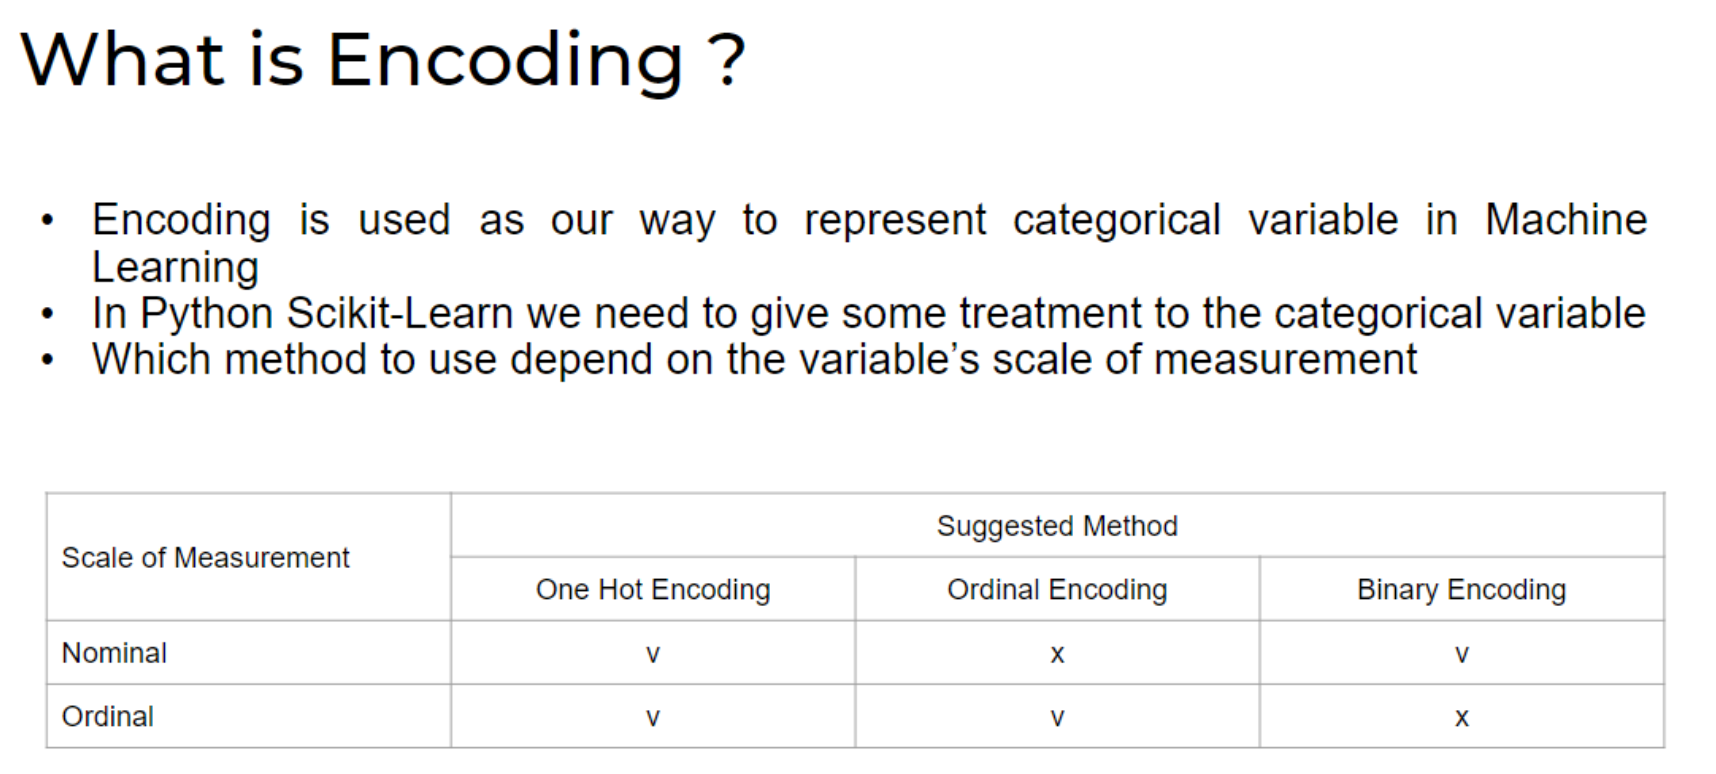

> ## __Pandas: Get Dummy__

In [ ]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head()

In [ ]:
#Mengeck jumlah data per kategori value setiap variable

for i in 'sex smoker day time'.split():
    print(tips[i].value_counts())

__NOTES:__
<br> these are the variables that we will transform into dummy variables.
- Sex two categories
- smoker two categories
- day four categories 
- time two categories. 
<br> For each categories we will make one dummy variable.

In [ ]:
#membuat dummy dari kolom yg telah ditentukan dan dijadikan dataframe

tips_dummy = pd.get_dummies(tips, columns='sex smoker day time'.split())
tips_dummy.head()

__Result:__
<br>You can clearly see that each variables now has dummy variables as many as the number of category.
(-) Jumlah kolom menjadi banyak sekali

> ## __ScikitLearn: One Hot Encoding__

One Hot Encoding also can be implemented using sklearn library. <br>we use OneHotEncoder and ColumnTransformer classes. <br>OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

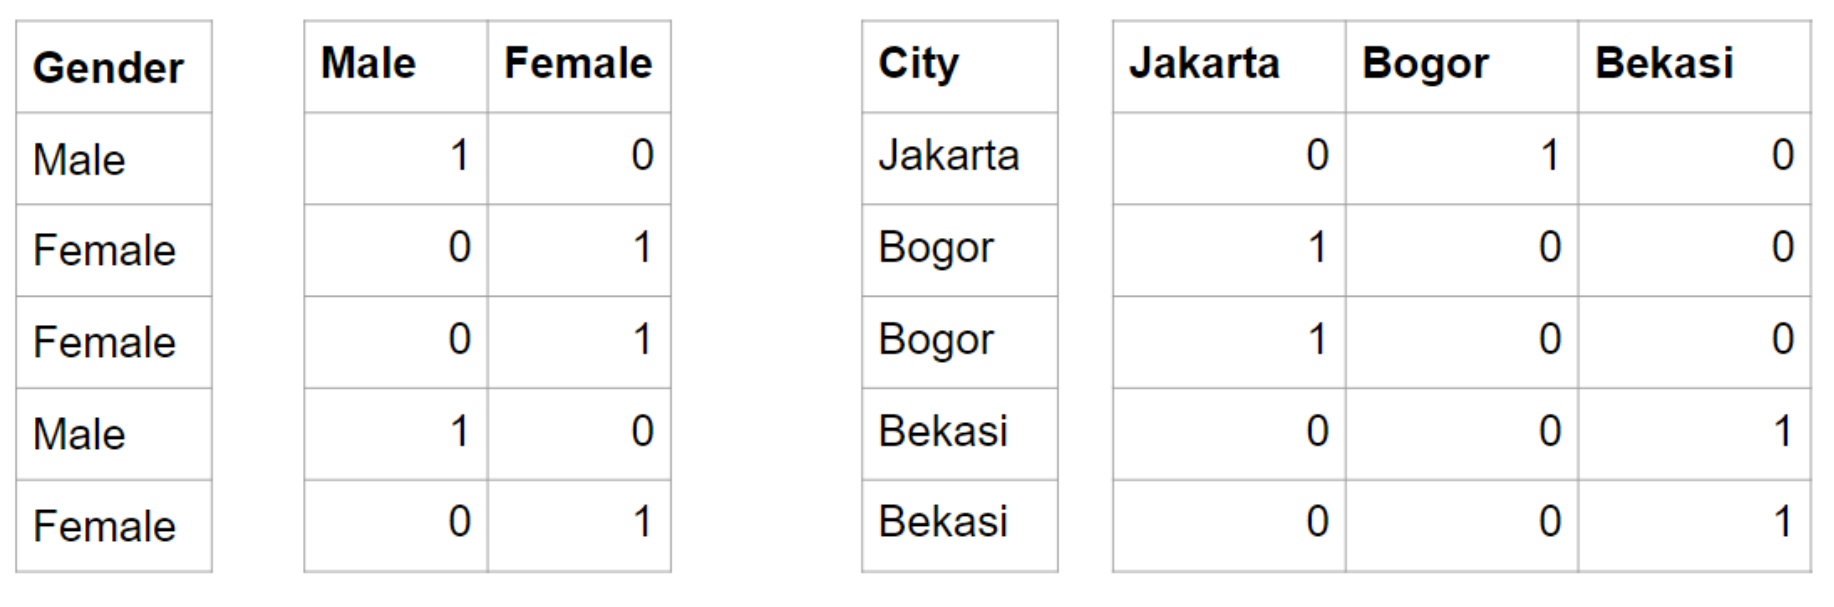

In [ ]:
#1. Import Library

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#Melihat parameter yg ada di onehot

OneHotEncoder().get_params()

In [ ]:
#2. Membuat ColumnTransformer(melakukan perubahan pada column) dan encoding

                                #nama proses, functionnya, datanya kolom apa aja
transformer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), 'sex smoker day time'.split())
])
# Jumlah kategori : 2 + 2 + 4 + 2 = 10
#jika ingin melakukan encoding lain untuk kolom lain, ditulis dialam tuple sesuai format diatas

tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded.head()
#minusnya nama columnya berubah jadi angka

__Notes:__
Using this method you don't automatically rename the variables. <br> You must get the name of the feature separately. <br>But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [ ]:
#mengecek nama kolom aslinya

transformer.get_feature_names()

In [ ]:
#mengubah nama kolom dataframe menjadi nama hasil encoding

tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips['total_bill tip size'.split()], tips_encoded], axis=1)
tips_encoded.head()

> ## __Manual: Ordinal Encoding (.map)__

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

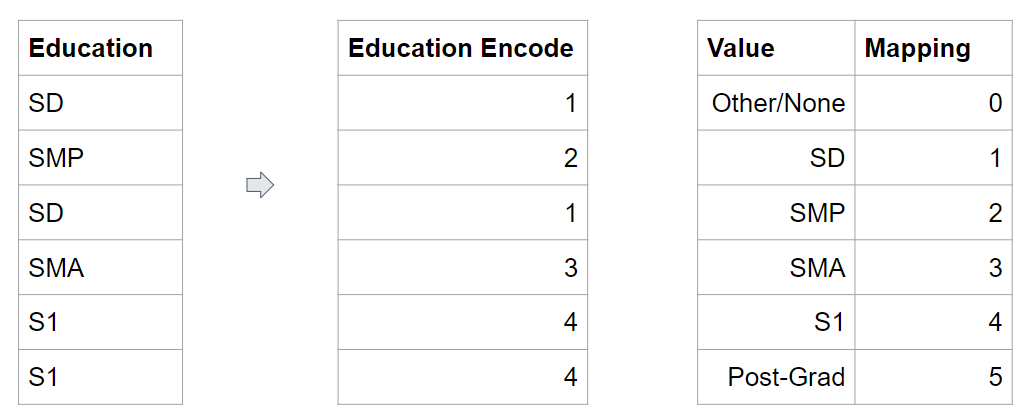

In [ ]:
#1. Mempersiapkan data

tips_ordinal_encoded = tips.copy()

In [ ]:
#2. Mengecek value counts

tips_ordinal_encoded.day.value_counts()

In [ ]:
#3. Melakukan encoding secara manual dengan .map

tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})
tips_ordinal_encoded.head()

In [ ]:
#4. Mengeck value counts yg sudah berubah

tips_ordinal_encoded.day.value_counts()

> ## __Category_encoder : OrdinalEncoder (ce)__

In [ ]:
#1. Import library

import category_encoders as ce

In [ ]:
#2. Membuat list dictionary dan encoding

#membuat list dictionary sesuai encoding yg diinginkan
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}}
]

#membuat objek dan encoding
ordinal_encoder = ce.OrdinalEncoder(cols = 'day', mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford.head()

In [ ]:
#3. menggabungkan tabel dengan concat

tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded.head()

In [ ]:
# CONTOH: encoding dua kolom sekaligus

ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}},
    {'col': 'time',
     'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day time'.split(), mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day time'.split()])
dford.head()

In [ ]:
#menggabungkan contoh diatas dengan concat

tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

> ## __Binary Encoding__

<br> Binary encoding using category_encoder library. 
<br> We will implement binary ecoding using the category_encoders library to day variable.

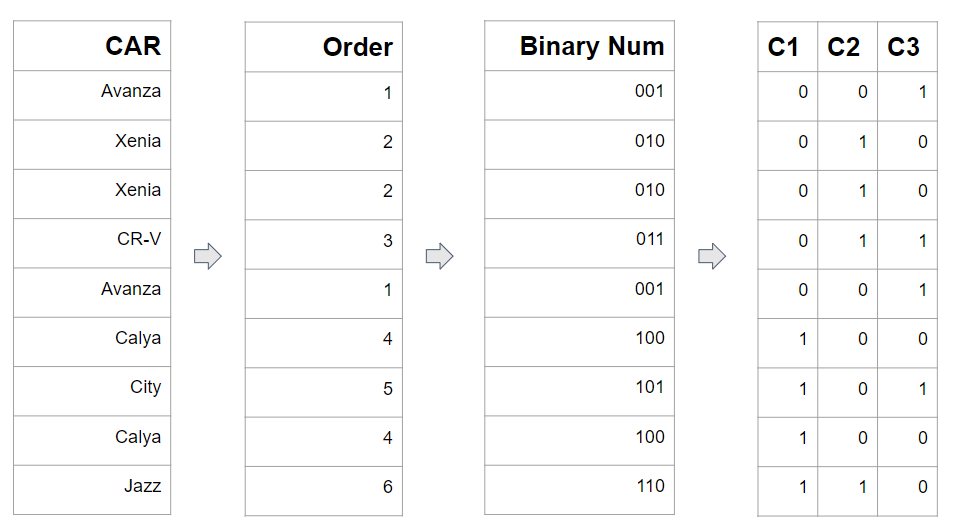

In [ ]:
#1.Melakukan encoding

binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin.head()

#hasil encoding muncul 3 kolom untuk binary karena jumlah kategori kolom aslinya ada 4 (thurs, fri, sat, sun)

In [ ]:
#2. Menggabungkan df asli dan hasil encoding

tips_binary_encoded = pd.concat([tips, dfbin], axis=1)
tips_binary_encoded.head()

In [ ]:
#mengeck unique

tips_binary_encoded['day'].unique()

#terdapat 4 kategori

In [ ]:
#Jika ada data baru dan mau diencode 

day = pd.Series('Fri Sat Sun Thur'.split(), name='day') #data baru 

day_binary = binary_encoder.transform(day) #encoder yg telah dibuat
day_binary

In [ ]:
#inverse transform untuk mengembalikan kembali ke data sebelum di encode

binary_encoder.inverse_transform(day_binary)

# __Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge__

> ## Table of Content
1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

tips

> ## Preprocessing

preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), 'sex smoker time'.split()),
    ('binary', ce.BinaryEncoder(), ['day']),
    ('robust', RobustScaler(), ['total_bill'])
], remainder = 'passthrough')

> ## Data Splitting

70(train) : 30(test)

In [ ]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

> ## Data Transform

Here, we will do preprocessing step. Like we discuss previously. we apply .fit only to training set and .transform for both training set and test set.

In [ ]:
X_train.head()

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
X_trp_df = pd.DataFrame(X_train_preprocessed)
X_tsp_df = pd.DataFrame(X_test_preprocessed)
X_trp_df

In [ ]:
transformer.transformers_

In [ ]:
transformer.transformers_[0][1].get_feature_names()

In [ ]:
transformer.transformers_[1][1].get_feature_names()

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled', 'size']
X_trp_df.columns = features
X_tsp_df.columns = features
X_trp_df

In [ ]:
X_tsp_df

Data Prep and Feature Engineering: 2 hari
Model Performance, Evaluation Method, Hyperparam Tuning: 2 hari
Imbalance Classification: 1 hari
Ensemble: 2 hari
Unsupervised
NLP
Recommender System
Model Deployment

> ## Model Fitting and evaluation

In [ ]:
ridge = Ridge()
ridge.fit(X_trp_df, y_train)

In [ ]:
y_pred = ridge.predict(X_tsp_df)
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))

> ## Model Properties

In [ ]:
coef_table = pd.DataFrame({'feature': X_trp_df.columns, 'coef': ridge.coef_})
coef_table

# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table of Content


1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
tips.head()

> ## Preprocessing

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [ ]:
ordinal_mapping = [
    {'col': 'day',
    'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
]

ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
    ('ordinal', ordinal_encoder, ['day']),
], remainder = 'passthrough')

preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

> ## Data Splitting

In [ ]:
X = tips.drop('tip', axis=1)
y = tips['tip']
features = X.columns

In [ ]:
Xtr, Xts, ytr, yts = train_test_split(X, y, random_state=10)

> ## Data Transform

In [ ]:
Xtr.head()

> ## fit-transform

In [ ]:
Xtr_p = transformer.fit_transform(Xtr)
Xts_p = transformer.transform(Xts)

> ## Change from 2d array to DF

In [ ]:
Xtr_p = pd.DataFrame(Xtr_p)
Xts_p = pd.DataFrame(Xts_p)

In [ ]:
transformer.transformers_

In [ ]:
Xtr.columns

In [ ]:
transformer.transformers_[0][1].get_feature_names()

In [ ]:
transformer.transformers_[1][1].get_feature_names()

In [ ]:
new_features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill', 'size']
new_features

In [ ]:
features

In [ ]:
Xtr_p.columns = new_features
Xts_p.columns = new_features

In [ ]:
display(Xtr_p.head())
display(Xts_p.head())

In [ ]:
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(Xtr_p, ytr)

In [ ]:
y_pred = dtr.predict(Xts_p)
print('mse:', mean_squared_error(yts, y_pred))
print('rmse:', np.sqrt(mean_squared_error(yts, y_pred)))

> ## Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'importance': dtr.feature_importances_
}, index=new_features)
importance_table

In [ ]:
importance_table.plot(kind='barh')

In [ ]:
plt.figure(figsize=(20,14))
plot_tree(dtr, feature_names = new_features, filled=True)
plt.show()

## __Outlier__

This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [ ]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

In [ ]:
df_association = pd.DataFrame({
    'x': x,
    'y': y,
    'y_real': y_real
})

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association)
# sns.lineplot(x='x', y='y_real', data=df_association)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')
plt.show()

Scatter Plot of two variable without outlier

> ## Global Outlier

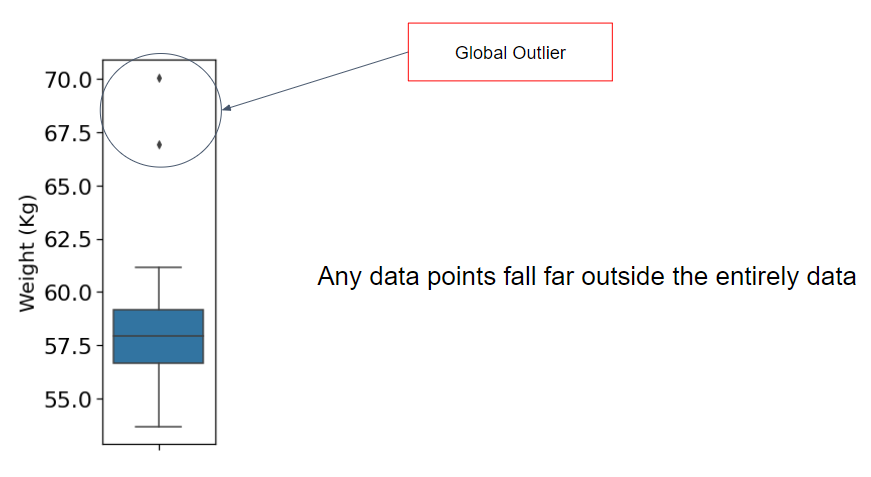

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_outlier = df_association.append(df_add)

In [ ]:
df_association_outlier

In [ ]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Global outlier for height

In [ ]:
plt.figure(figsize=(7,2))
sns.boxplot(x=df_association_outlier['x'])
plt.xlabel('Height (cm)')

> ## Contextual Outlier

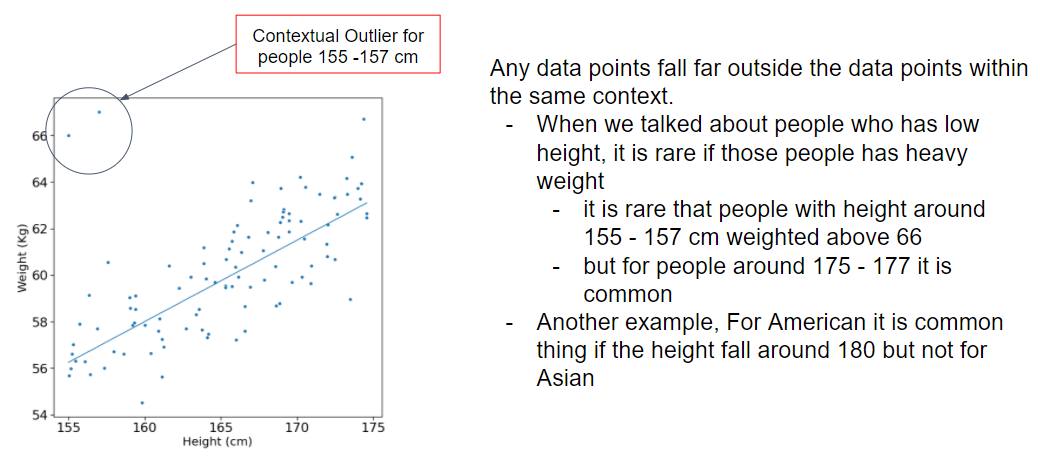

In [ ]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

In [ ]:
df_association = pd.DataFrame({'x': x, 'y': y, 'y_real': y_real})

In [ ]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_contextual = df_association.append(df_add)

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association_contextual)
# sns.lineplot(x='x', y='y_real', data=df_association_contextual)
plt.xlabel('Height (cm)', fontsize=20)
plt.ylabel('Weight (Kg)', fontsize=20)

> ## Influential Observation

In [ ]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_influenced = df_association.append(df_add)

In [ ]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_influenced['y'])
plt.ylabel('Weight (kg)', fontsize = 20)

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x', y='y', data=df_association_influenced)
sns.lineplot(x='x', y='y_real', data=df_association_influenced)
sns.regplot(x='x', y='y', data = df_association_influenced)
plt.legend(['line without outlier', 'line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.show()

## __Binning__

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

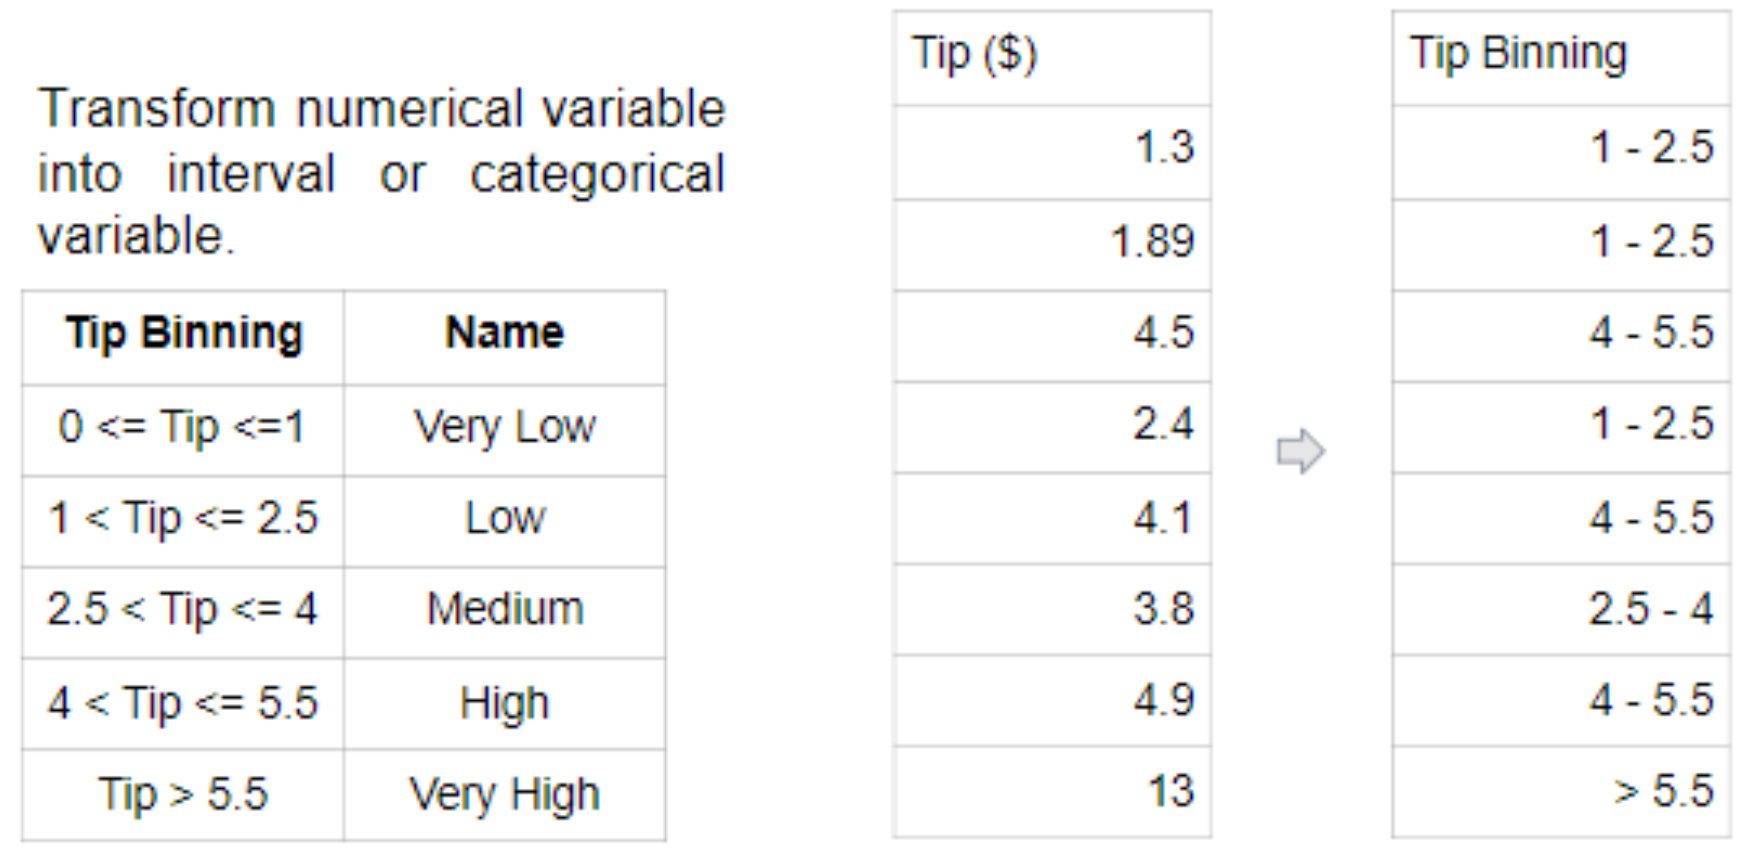

In [ ]:
tips.head()

In [ ]:
sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.show()

In [ ]:
tips2 = tips.copy()
tips2.head()

In [ ]:
tips2['total_bill_eqfreq'] = pd.qcut(tips2['total_bill'], 5)
tips2['total_bill_eqfreq_encoded'] = pd.qcut(tips2['total_bill'], 5, labels = range(1,6))

In [ ]:
tips2['total_bill_eqintv'] = pd.cut(tips2['total_bill'], 5)
tips2['total_bill_eqintv_encoded'] = pd.cut(tips2['total_bill'], 5, labels = range(1,6))

In [ ]:
tips2['total_bill total_bill_eqfreq total_bill_eqintv total_bill_eqfreq_encoded total_bill_eqintv_encoded'.split()]

> ## Equal Frequencies : Quantile

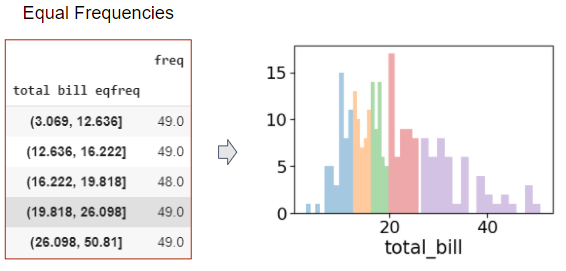

In [ ]:
eqfreq = tips2.pivot_table(
    index ='total_bill_eqfreq',
    aggfunc = len,
    values = 'tip'
)
eqfreq.columns = ['freq']
eqfreq

> ## Equal Interval

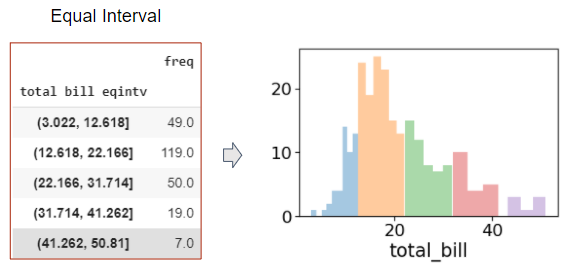

In [ ]:
eqintv = tips2.pivot_table(
    index = 'total_bill_eqintv',
    aggfunc = len,
    values = 'tip'
)
eqintv.columns = ['freq']
eqintv

In [ ]:
for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == i]['total_bill'], kde=False)

In [ ]:
sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde=False)

In [ ]:
sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde=True)

In [ ]:
tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]

> ## Binning Effect on Modeling

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
disk = pd.read_csv('disk.csv')

In [ ]:
disk.head()

In [ ]:
disk['class'].value_counts(normalize=True)

In [ ]:
disk.describe()

In [ ]:
disk['x_eqintv'] = pd.cut(disk['x'], 7)
disk['x_eqintv_encoded'] = pd.cut(disk['x'], 7, labels = range(1,8))

In [ ]:
disk.head()

In [ ]:
len(disk) # banyaknya data / sample

In [ ]:
pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0)

In [ ]:
pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0).plot(kind = 'bar', stacked=True)
plt.show()

from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.

MODEL 1

In [ ]:
X = disk[['x']]
y = disk['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

MODEL 2

In [ ]:
discretize = KBinsDiscretizer(n_bins=7, encode='onehot', strategy='uniform') # uniform = eqintv ; quantile = eqfreq
discretize.fit(X_train)
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [ ]:
print(X_train_disc[:5])

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_disc, y_train)

In [ ]:
y_pred = logreg.predict(X_test_disc)
print('accuracy', accuracy_score(y_test, y_pred))

After we apply binning, the accuracy significantly improve from 58.22% to 69.97%. Binning surely can be used to improve model performance.

# __Missing Value__

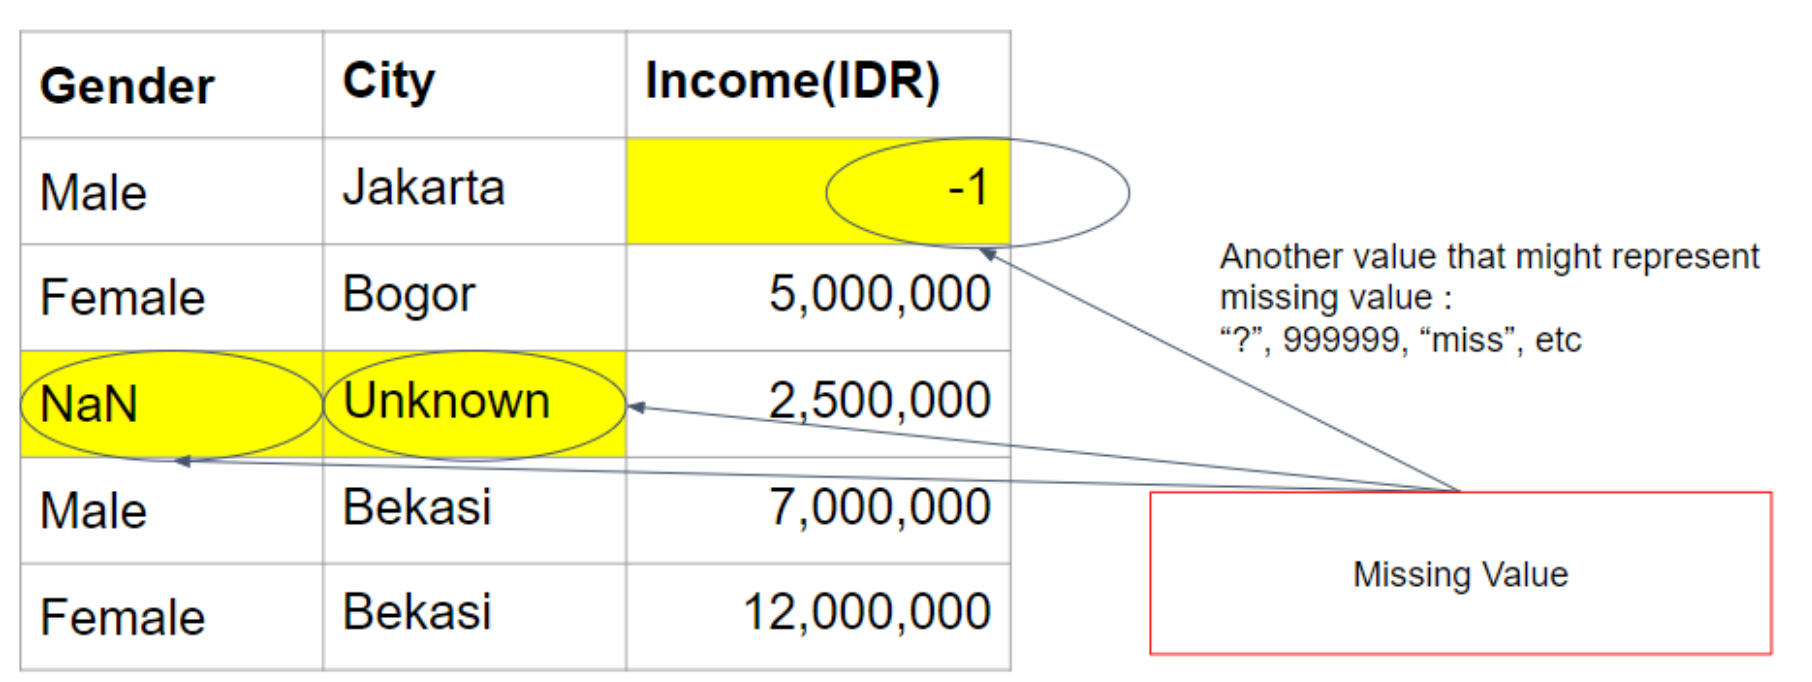

> ## Simple Imputer

In [ ]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan],
    'x7':[3,5,4,5,'-',5]
    })
df

In [ ]:
df.info()

In [ ]:
df['x7'].value_counts()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp_num = SimpleImputer(strategy = 'mean')
df[['x1', 'x2', 'x3']] = imp_num.fit_transform(df[['x1', 'x2', 'x3']])
df

In [ ]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4', 'x5']] = imp_mode.fit_transform(df[['x4', 'x5']])
df

In [ ]:
imp_const = SimpleImputer(strategy='constant', fill_value='P')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

In [ ]:
imp_const = SimpleImputer(missing_values='-', strategy='constant', fill_value=np.nan)
df[['x7']] = imp_const.fit_transform(df[['x7']])
df

In [ ]:
df.info()

> ## Iterative Imputer

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [ ]:
df

In [ ]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)
df[['x1', 'x2', 'x3']] = imp_iter.fit_transform(df[['x1', 'x2', 'x3']])

In [ ]:
df

> ##  Nearest Neighbour Imputer

Nearest negihbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

In [ ]:
df

In [ ]:
imp_knn = KNNImputer(n_neighbors=2, weights='uniform')
df[['x1', 'x2', 'x3']] = imp_knn.fit_transform(df[['x1', 'x2', 'x3']])

In [ ]:
df

# Generate New Features : Polynomial

Relationship between variables often appear to be unlinear. Thus, when you still wanna use linear model (logistic regression and linear regression) you can add polynomial features.

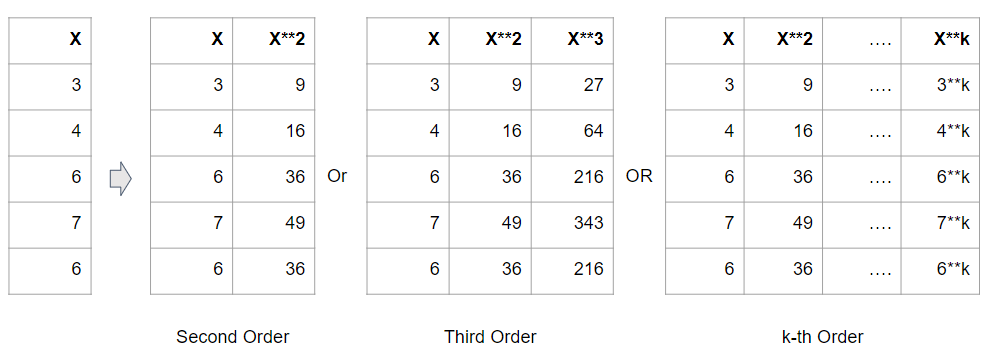

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the illustration below, you can see how is the effect of the polynomial feature. We will do modeling twice. First, without polynomial features. Second, with polynomial features. The target variabel is
1. (+) a good quality wine : quality > 6
1. (-) a bad quality wine : quality <= 6

<br>
Features: alcohol and density

In [ ]:
wine = pd.read_csv('white_wine.csv')

In [ ]:
wine.isna().sum()

In [ ]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts()

In [ ]:
wine.dropna(inplace=True)

In [ ]:
wine.isna().sum()

In [ ]:
X = wine[['density', 'alcohol']]
y = wine['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020)

MODEL 1: Tanpa Polynomial

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('accuracy', accuracy_score(y_test, y_pred))

MODEL 2: Menggunakan Polynomial

In [ ]:
poly = PolynomialFeatures(degree = 3, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
poly.get_feature_names()

In [ ]:
X_train

In [ ]:
pd.DataFrame(X_train_poly, columns = poly.get_feature_names())

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train)

In [ ]:
y_pred = logreg.predict(X_test_poly)
print('accuracy', accuracy_score(y_test, y_pred))

## __Polynomial Regression__

In [ ]:
np.random.seed(1)
x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))
df_poly = pd.DataFrame({'x':x, 'y':y})
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])


In [ ]:
df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'b-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'g--', label='Lasso')
# plt.plot(df_poly['x'], df_poly['elastic'], 'm--', label='ElasticNet')
plt.legend()
plt.show()

In [ ]:
df_poly.head()

In [ ]:
df_poly[['x', 'y']].corr()

In [ ]:
poly = PolynomialFeatures(3, include_bias=False)
feature_poly = poly.fit_transform(df_poly[['x']])
poly_df = pd.DataFrame(feature_poly, columns=poly.get_feature_names())
poly_df['y'] = df_poly['y']

In [ ]:
poly_df.head()

In [ ]:
lr_poly = LinearRegression().fit(poly_df[['x0', 'x0^2']], poly_df['y'])
poly_df['y_pred'] = lr_poly.predict(poly_df[['x0', 'x0^2']])

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(poly_df['x0'], poly_df['y'])
plt.plot(poly_df['x0'], poly_df['y_pred'], 'r--', label='LinearRegression')
plt.show()

# Apply Several Preprocessing Method to Modeling at once Part 2

> ## Table Of Contents

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

> ## Data

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [ ]:
adult = pd.read_csv('adult.csv')
adult

In [ ]:
adult['income'].value_counts(normalize=True)

In [ ]:
adult.describe()

In [ ]:
adult.info()

> ## Missing Value

In [ ]:
Missing value in this dataset marked with "?"

In [ ]:
adult.replace('?', np.nan, inplace=True)

In [ ]:
adult.isna().sum()/len(adult)

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(adult[['workclass', 'occupation', 'native.country']].isna())

The Missing Variable:
1. workclass
1. occupation
1. native.country

> ## Preprocessing

In [ ]:
categorical_features = adult.columns[adult.dtypes == object]
adult[categorical_features].describe()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

In [ ]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_pipe', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

> ## Data Splitting

In [ ]:
X = adult.drop(columns = ['fnlwgt', 'income', 'education'], axis=1)
y = np.where(adult['income']=='>50K', 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

> ## Data Transformation

In [ ]:
len(X_train)

In [ ]:
X_train.head()

In [ ]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)
X_train_preprocessed

In [ ]:
X_train['workclass'].unique()

In [ ]:
transformer.transformers_

In [ ]:
transformer.transformers_[0][1].get_feature_names()

In [ ]:
transformer.transformers_[1][1]['binary'].get_feature_names()

In [ ]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary'].get_feature_names() + 'age education.num capital.gain capital.loss hours.per.week'.split()
len(features)

In [ ]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

> ## Model Fitting and evaluation

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_preprocessed, y_train)

In [ ]:
y_pred = model.predict(X_test_preprocessed)
print('Accuracy', accuracy_score(y_test, y_pred))

> ## Model Properties

In [ ]:
importance_table = pd.DataFrame({
    'imp': model.feature_importances_
}, index=features)
importance_table.sort_values('imp', ascending=False)

In [ ]:
importance_table.plot(kind='barh', figsize=(10,15))
plt.show()

In [ ]:
plt.figure(figsize=(20,14))
plot_tree(model, feature_names=features, filled=True, class_names = ['<=50K', '>50K'])
plt.show()

In [ ]:
x = np.arange(0, 360, 10)
y = np.arange(100, 460, 10)
df_coba = pd.DataFrame(x)
df_coba['y'] = y
df_coba

In [ ]:
# pipe = Pipeline([
#     ('standard', StandardScaler()),
#     ('model', DecisionTreeRegressor(max_depth=3))
# ])

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df_coba[[0]], df_coba['y'])

In [ ]:
# pipe.fit(X_train, y_train)

In [ ]:
# y_pred = pipe.predict(X_test)
# mean_squared_error(y_test, y_pred)

In [ ]:
# pipe.transform(X_train)

In [ ]:
# X_train

In [ ]:
# y_train

In [ ]:
# y_pred

In [ ]:
# result = pd.DataFrame()
# result['y_test'] = y_test
# result['y_pred'] = y_pred
# result

## __Feature Selection__

> ## Table Of Content

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

from sklearn.feature_selection import SelectPercentile

> ## Data Transformation

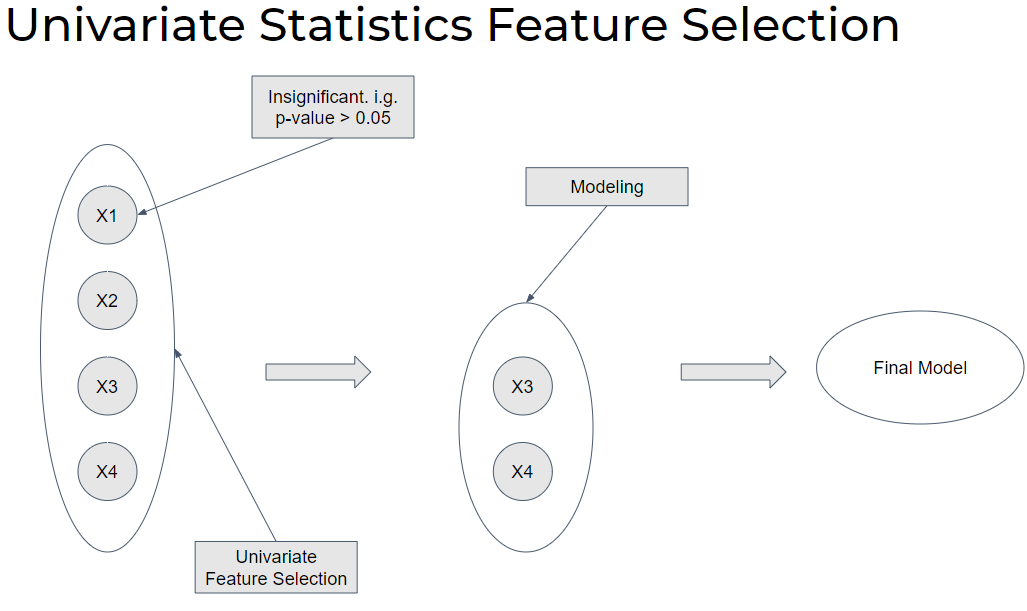

In [ ]:
select = SelectPercentile(percentile=50)
select.fit(X_train_preprocessed, y_train)

In [ ]:
X_train_selected = select.transform(X_train_preprocessed)
X_test_selected = select.transform(X_test_preprocessed)

In [ ]:
print('before selection', X_train_preprocessed.shape)
print('after selection', X_train_selected.shape)

In [ ]:
mask = select.get_support()
mask

In [ ]:
select.scores_

In [ ]:
X_train_preprocessed['0_0'].describe()

In [ ]:
selected_features = pd.DataFrame({
    'indicator': mask,
    'score': select.scores_,
    'features': features
})
selected_features

> ## Model Fitting and Evaluation

In [ ]:
model = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model.fit(X_train_selected, y_train)
print('score', model.score(X_test_selected, y_test))

In [ ]:
accuracy_score(y_test, model.predict(X_test_selected))

In [ ]:
model2 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model2.fit(X_train_preprocessed, y_train)
print('score', model2.score(X_test_preprocessed, y_test))

## __Recursive Feature Selection__

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
selector = RFE(model2, n_features_to_select = 10, step=1)
selector.fit(X_train_preprocessed, y_train)
selector.support_

In [ ]:
rfe_df = pd.DataFrame({'indicator': selector.support_, 'features': X_train_preprocessed.columns})
selected = rfe_df[rfe_df['indicator'] == True]['features']

In [ ]:
model3 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model3.fit(X_train_preprocessed[selected], y_train)
model3.score(X_test_preprocessed[selected], y_test)